#  Install gdds()

In [5]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("gdds", quietly = TRUE)) {
  remotes::install_github("agronomy4future/gdds")
}
library(remotes)
library(gdds)

# Upload the dataset for practice

In [6]:
if(!require(readr)) install.packages("readr")
library(readr)

github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/Apr_15_to_Sep_12.csv"
df= data.frame(read_csv(url(github), show_col_types=FALSE))

head(df,5)

,Year,Date,Day,Max,Min,Avg
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2024,1-Jan,1,3.35,-5.13,-1.72
2,2024,2-Jan,2,2.61,-5.37,-2.12
3,2024,3-Jan,3,3.13,-3.90,-1.13
4,2024,4-Jan,4,3.94,-4.01,-0.91
5,2024,5-Jan,5,3.08,-4.11,-1.13


# Calculate GDDs for corn

In [8]:
corn_gdds= gdds(df, "Date", "Avg", date= c("2024-05-20", "2024-08-30"), BT= 10)

head(corn_gdds,5)

,Year,Date,Day,Max,Min,Avg,date_range,adjusted_temp,Days,GDDs
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<int>,<dbl>
1,2024,20-May,141,29.02,17.80,23.45,2024-05-20,13.45,1,13.45
2,2024,21-May,142,29.56,19.31,24.58,2024-05-21,14.58,2,28.03
3,2024,22-May,143,24.74,15.28,20.09,2024-05-22,10.09,3,38.12
4,2024,23-May,144,26.77,12.47,20.44,2024-05-23,10.44,4,48.56
5,2024,24-May,145,26.78,17.51,21.96,2024-05-24,11.96,5,60.52


# Calculate GDDs for wheat

In [9]:
wheat_gdds= gdds(df, "Date", "Avg", date= c("2024-02-20", "2024-03-01"), BT= 4)

head(wheat_gdds,5)

,Year,Date,Day,Max,Min,Avg,date_range,adjusted_temp,Days,GDDs
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<int>,<dbl>
1,2024,20-Feb,51,12.18,-1.94,3.44,2024-02-20,0.00,1,0.00
2,2024,21-Feb,52,16.26,-0.08,8.70,2024-02-21,4.70,2,4.70
3,2024,22-Feb,53,15.59,5.43,10.87,2024-02-22,6.87,3,11.57
4,2024,23-Feb,54,11.80,1.31,6.46,2024-02-23,2.46,4,14.03
5,2024,24-Feb,55,4.08,-5.18,-0.51,2024-02-24,0.00,5,14.03


# Calculate GDDs using gdds() with grouping.

In [10]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/Apr_15_to_Sep_12_grouping.csv"
df = data.frame(read_csv(url(github), show_col_types=FALSE))

set.seed(100)
df[sample(nrow(df),7),]

,Year,Date,planting_date,Max,Min,Avg
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
202,2024,20-Jul,Apr_15,25.65,14.27,20.79
503,2024,8-Sep,May_19,20.29,6.68,13.87
358,2024,11-Aug,May_2,24.35,12.33,18.95
112,2024,21-Apr,Apr_15,14.01,-0.71,6.57
499,2024,4-Sep,May_19,27.94,9.59,19.62
473,2024,9-Aug,May_19,22.50,14.02,19.09
206,2024,24-Jul,Apr_15,28.37,19.10,23.81


# Calculate GDDs for hemp

In [11]:
hemp_gdds= gdds(df, "Date", "Avg", "planting_date", date= c("2024-04-15", "2024-08-30"), BT= 1)

head(hemp_gdds,5)

Year,Date,planting_date,Max,Min,Avg,date_range,adjusted_temp,Days,GDDs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<int>,<dbl>
2024,15-Apr,Apr_15,26.69,13.02,19.13,2024-04-15,18.13,1,18.13
2024,16-Apr,Apr_15,27.23,13.94,20.52,2024-04-16,19.52,2,37.65
2024,17-Apr,Apr_15,21.12,10.69,17.74,2024-04-17,16.74,3,54.39
2024,18-Apr,Apr_15,22.43,8.15,16.17,2024-04-18,15.17,4,69.56
2024,19-Apr,Apr_15,14.05,5.72,9.82,2024-04-19,8.82,5,78.38


# Create a graph

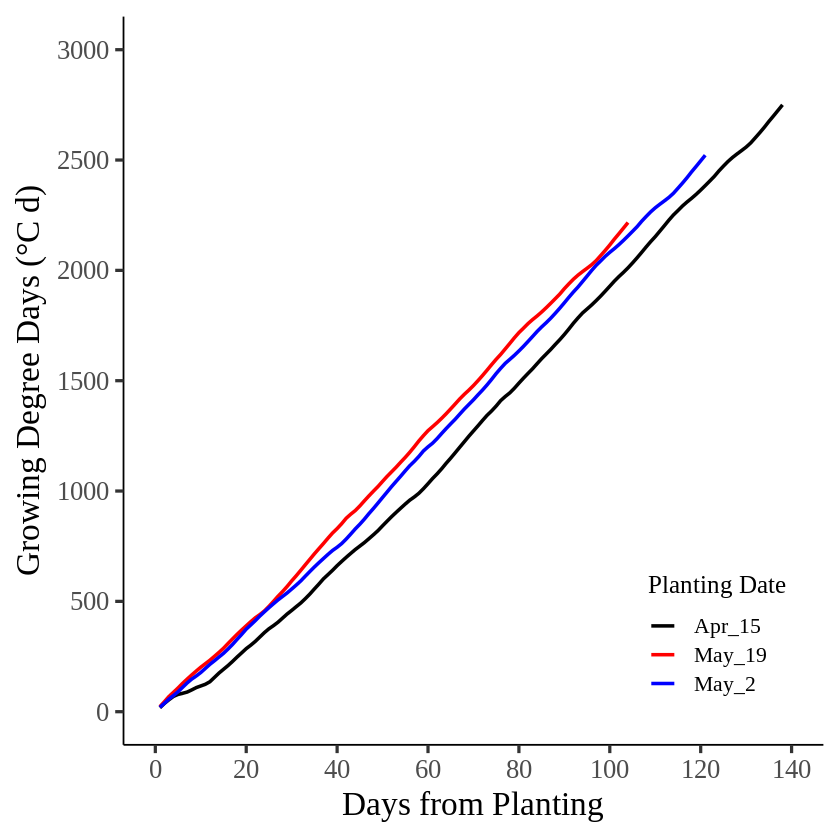

In [13]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=hemp_gdds, aes(x=as.numeric(Days), y=GDDs, group=planting_date)) +
  geom_line(aes(color=planting_date), size=1) +
  scale_color_manual(values=c("black","red","blue")) +
  scale_x_continuous(breaks=seq(0,140,20),limits=c(0,140)) +
  scale_y_continuous(breaks=seq(0,3000,500),limits=c(0,3000)) +
  labs(x="Days from Planting", y="Growing Degree Days (°C d)", color="Planting Date") +
  theme_classic(base_size=20, base_family="serif") +
  theme(legend.position=c(0.85,0.15),
        legend.key=element_rect(color="white", fill="white"),
        legend.title=element_text(family="serif", face="plain",
                                 size=15, color= "Black"),
        legend.text=element_text(family="serif", face="plain",
                                 size=13, color= "Black"),
        legend.background=element_rect(fill= alpha(0.5)),
        axis.line=element_line(linewidth=0.5, colour="black"))